In [ ]:
%matplotlib inline


# Eddy detection : Gulf stream

Script will detect eddies on adt field, and compute u,v with method add_uv(which could use, only if equator is avoid)

Figures will show different step to detect eddies.


In [1]:
from datetime import datetime

from matplotlib import pyplot as plt
from numpy import arange

from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.eddy_feature import Contours

In [5]:
def start_axes(title):
    fig = plt.figure(figsize=(13, 8))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    #ax.set_xlim(279, 304), ax.set_ylim(29, 44)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))

Load Input grid, ADT is used to detect eddies



We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc


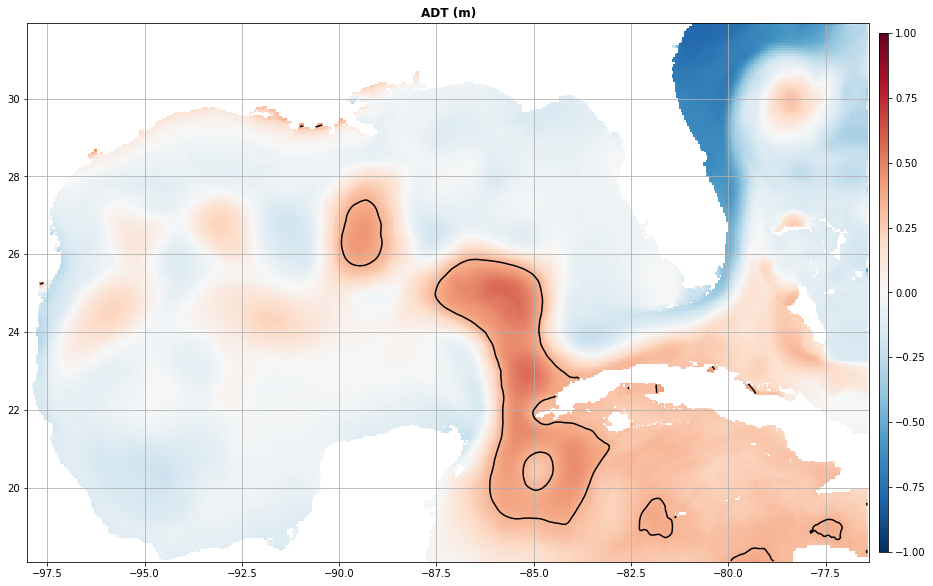

In [6]:
#Load the ADT data
g = RegularGridDataset(("/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc"),
    "lon",
    "lat",
)
ax = start_axes("ADT (m)")
m = g.display(ax, "adt", vmin=-1, vmax=1, cmap="RdBu_r")
# Draw line on the gulf stream front
great_current = Contours(g.x_c, g.y_c, g.grid("adt"), levels=(0.35,), keep_unclose=True)
great_current.display(ax, color="k")
update_axes(ax, m)

## Get geostrophic speed u,v
U/V are deduced from ADT, this algortihm is not ok near the equator (~+- 2°)



In [ ]:
g.add_uv("adt")

## Pre-processings
Apply a high-pass filter to remove the large scale and highlight the mesoscale



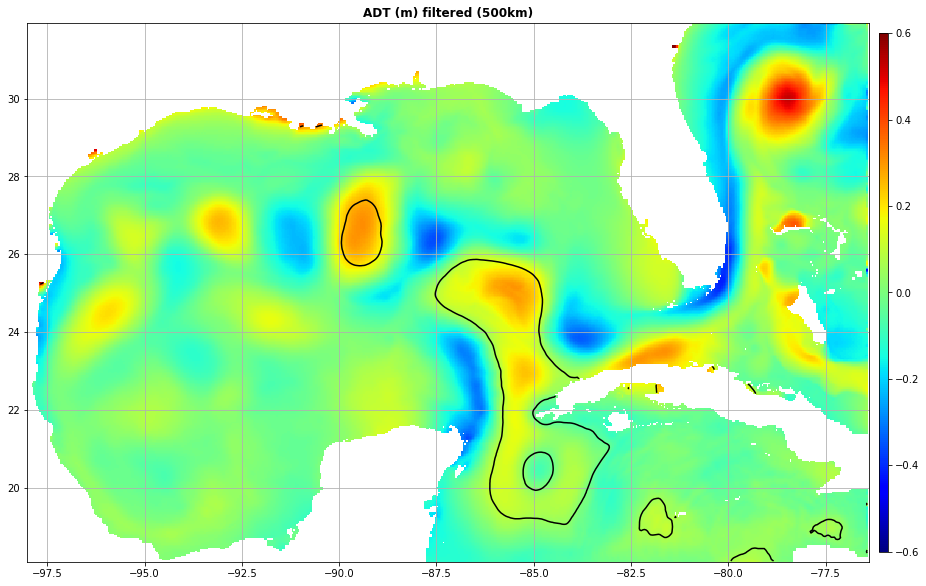

In [9]:
#g.bessel_high_filter("adt", 500,order=3)
ax = start_axes("ADT (m) filtered (500km)")
m = g.display(ax, "adt", vmin=-.6, vmax=.6, cmap="jet")
great_current.display(ax, color="k")
update_axes(ax, m)

## Identification
Run the identification step with slices of 2 mm



In [11]:
date = datetime(2006, 3, 9)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

/data/watkinson/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Display of all closed contours found in the grid (only 1 contour every 5)



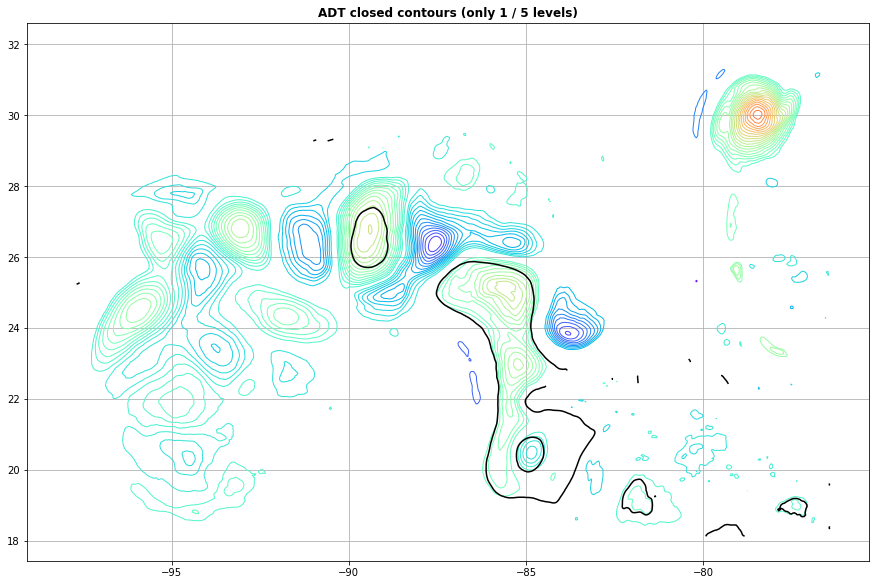

In [12]:
ax = start_axes("ADT closed contours (only 1 / 5 levels)")
g.contours.display(ax, step=5, lw=1)
great_current.display(ax, color="k")
update_axes(ax)

Contours included in eddies



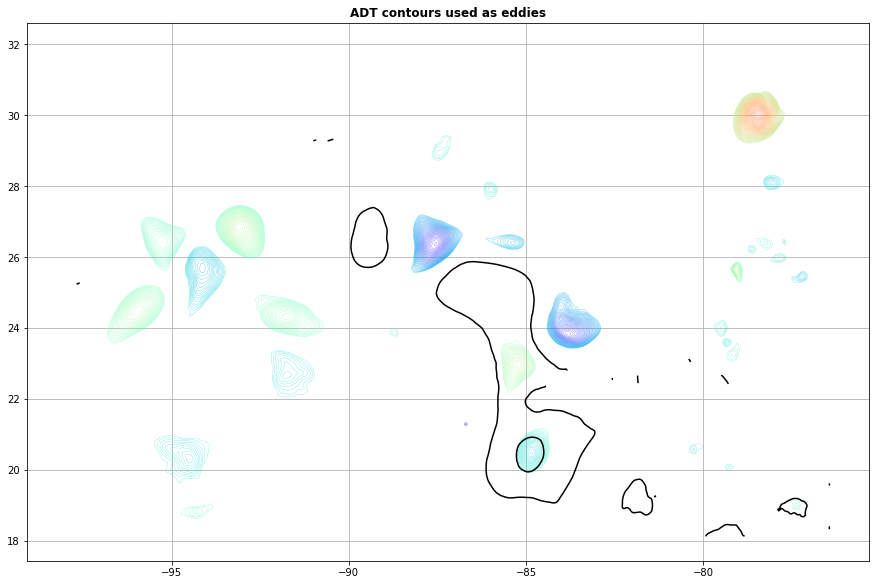

In [13]:
ax = start_axes("ADT contours used as eddies")
g.contours.display(ax, only_used=True, lw=0.25)
great_current.display(ax, color="k")
update_axes(ax)

## Post analysis
Contours can be rejected for several reasons (shape error to high, several extremum in contour, ...)



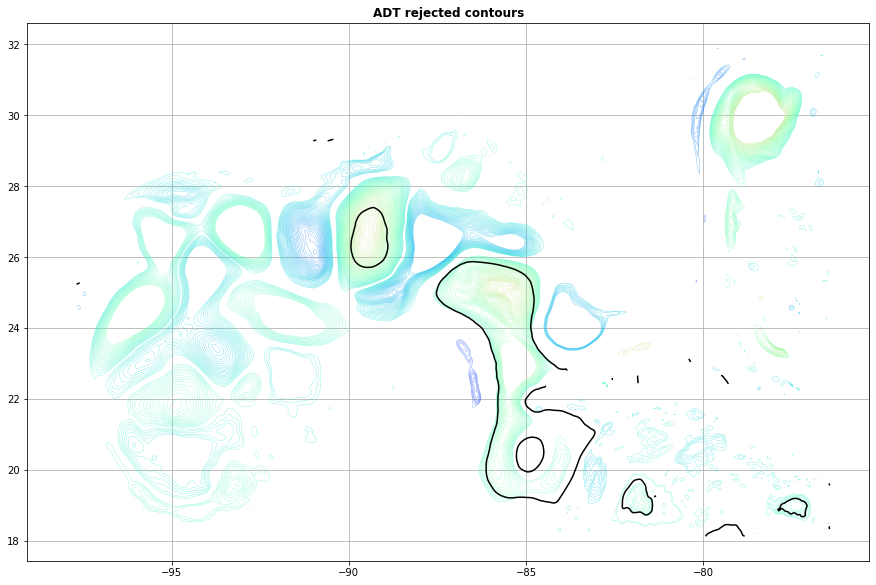

In [14]:
ax = start_axes("ADT rejected contours")
g.contours.display(ax, only_unused=True, lw=0.25)
great_current.display(ax, color="k")
update_axes(ax)

Criteria for rejecting a contour :
 0. Accepted (green)
 1. Rejection for shape error (red)
 2. Masked value within contour (blue)
 3. Under or over the pixel limit bounds (black)
 4. Amplitude criterion (yellow)



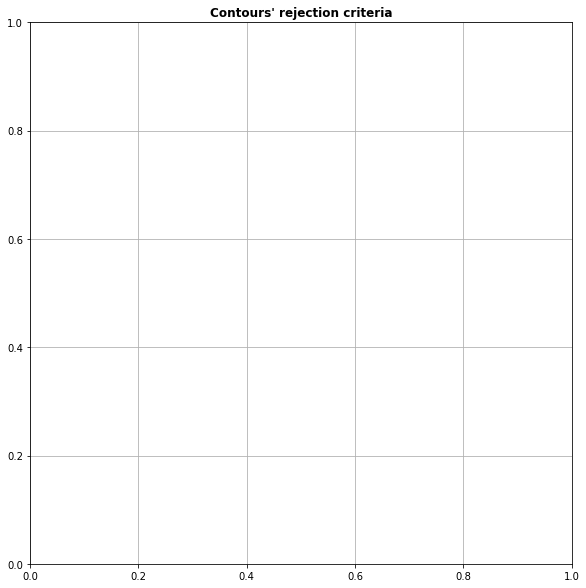

In [15]:
ax = start_axes("Contours' rejection criteria")
g.contours.display(ax, only_unused=True, lw=0.5, display_criterion=True)
update_axes(ax)

Display the shape error of each tested contour, the limit of shape error is set to 55 %



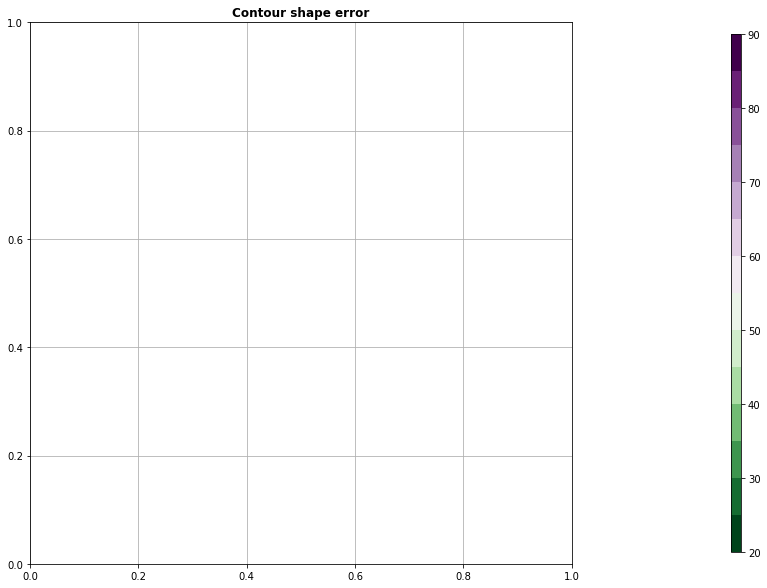

In [16]:
ax = start_axes("Contour shape error")
m = g.contours.display(
    ax, lw=0.5, field="shape_error", bins=arange(20, 90.1, 5), cmap="PRGn_r"
)
update_axes(ax, m)

Some closed contours contains several eddies (aka, more than one extremum)



In [ ]:
ax = start_axes("ADT rejected contours containing eddies")
g.contours.label_contour_unused_which_contain_eddies(a)
g.contours.label_contour_unused_which_contain_eddies(c)
g.contours.display(
    ax,
    only_contain_eddies=True,
    color="k",
    lw=1,
    label="Could be a contour of interaction",
)
a.display(ax, color="r", linewidth=0.75, label="Anticyclonic", ref=-10)
c.display(ax, color="b", linewidth=0.75, label="Cyclonic", ref=-10)
ax.legend()
update_axes(ax)

## Output
When displaying the detected eddies, dashed lines are for effective contour, solide lines for the contour of the
maximum mean speed. See figure 1 of https://doi.org/10.1175/JTECH-D-14-00019.1



In [ ]:
ax = start_axes("Eddies detected")
a.display(
    ax, color="r", linewidth=0.75, label="Anticyclonic ({nb_obs} eddies)", ref=-10
)
c.display(ax, color="b", linewidth=0.75, label="Cyclonic ({nb_obs} eddies)", ref=-10)
ax.legend()
great_current.display(ax, color="k")
update_axes(ax)

Display the effective radius of the detected eddies



In [ ]:
ax = start_axes("Effective radius (km)")
a.filled(ax, "radius_e", vmin=10, vmax=150, cmap="magma_r", factor=0.001, lut=14)
m = c.filled(ax, "radius_e", vmin=10, vmax=150, cmap="magma_r", factor=0.001, lut=14)
great_current.display(ax, color="k")
update_axes(ax, m)